<a href="https://colab.research.google.com/github/PrinceChauhanhub/Machine_Learning/blob/main/Project_2_Predictive_Analysis_in_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predictive Analysis of Diabetic data using Logistic Regression**

Import all the libraries and packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Creating a Dataframe and looking into the data

In [ ]:
dataframe = pd.read_csv("/content/drive/MyDrive/Machine Learning Bootcamp/Logistic Regression/Project 2/diabetes (1).csv")
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**# STEP 2 -> Data Understanding**

**Analysing the dataset**

Total Features : 8
independent features : Pregnanacies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Target Column : Outcome

    *   Target Column : Outcome gives result as [0,1] which implies it is a binary classification task.
    *   as the target column is available which means it is a part of supervised ML algorithm
    *   logistic regression is used in this type of dataset.
    



checking the datatype of each column to undestand the data

In [ ]:
dataframe.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


Checking the missing value in the dataset.so that we can conlude that we need to do data imputation or not

In [ ]:
dataframe.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


No null value found in the dataset which is good. so no data imputation required

**Analysing dataset more precisely**

In [ ]:
dataframe.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


by analysing the we find that there are so may value which are o. </br>
e.g - blood pressure is 0 .it is not possible in real life scenario that BP = 0

so we need to do data imputation of 0's in every features.

Note : Here we are doing data imputation not with Null values but we are doing it with 0's.

Checking the shape of dataset

In [ ]:
dataframe.shape

(768, 9)

records - 768 </br>
columns - 8 + 1(Target column)

**# STEP 3 -> Exploratory Data Analysis**

Checking the correlation value between two features.

In [ ]:
dataframe.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Using Heatmap to understand the correlation more precisely.

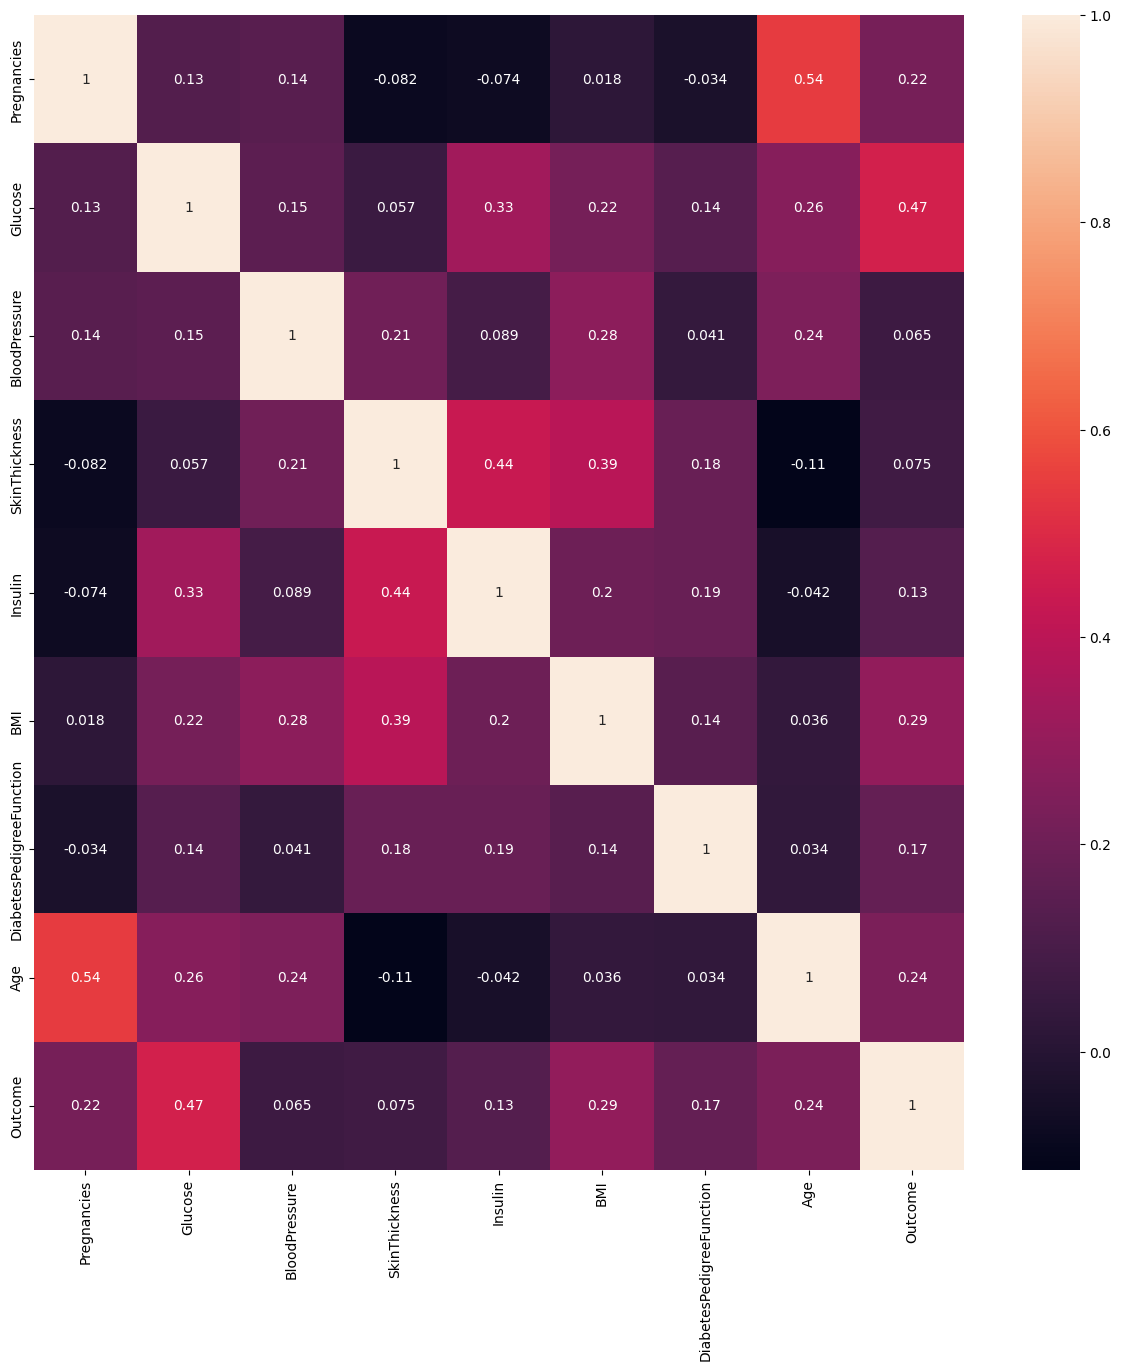

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(dataframe.corr(),annot=True)
plt.savefig("Correlation-coefficient.jpg")
plt.show()

There are no two features which are highy corelated so we can't remove any feature.
every feature is important.

Checking Descriptive Stats of the data.

In [ ]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


here we can see dataset is not in standard normal form (mean!=0 and std != 1).

**Data Imputation** </br>
the ways are:

1 - data imputation by any of central tendancy measure(mean, median, mode).

2 - Using KNN Model

we will use the first way - by using central tendancy measure.

the given dataset is not in standard normal form (symmetric distribution) which means it is a **Non- symmetric** Distrbution.

By knowing that its a **non symmetric** distribution which indicates that there are **outlier** present in the dataset.

we will use Median as central tendancy measure bcs median is most robust in case of outliers.

if dataset is in symmetric distribution then we use mean.

<ipython-input-67-162c3d4b5edb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['Pregnancies'])


<Axes: xlabel='Pregnancies', ylabel='Density'>

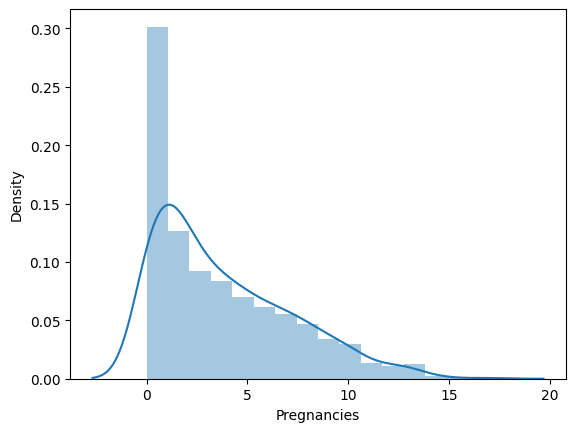

In [ ]:
 sns.distplot(dataframe['Pregnancies'])

right skewed bcs of too many 0's.</br>
for this we go with median imputation

In [ ]:
## Doing Data Imputation

##Pregnancies -> Right Skewed Distribution
dataframe['Pregnancies'] = dataframe['Pregnancies'].replace(0,dataframe['Pregnancies'].median())

<ipython-input-69-c2941e0297ca>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['BloodPressure'])


<Axes: xlabel='BloodPressure', ylabel='Density'>

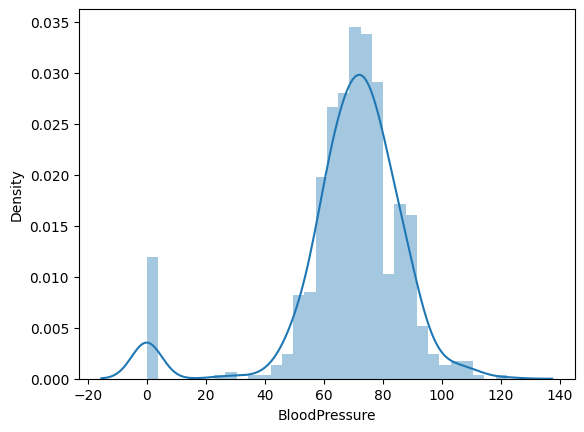

In [ ]:
sns.distplot(dataframe['BloodPressure'])

for this we go with mean imputation

In [ ]:
## Doing Data Imputation

##BloodPressure -> Symmetric kind Distribution
dataframe['BloodPressure'] = dataframe['BloodPressure'].replace(0,dataframe['BloodPressure'].mean())

<ipython-input-71-17afe7c06d49>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['Insulin'])


<Axes: xlabel='Insulin', ylabel='Density'>

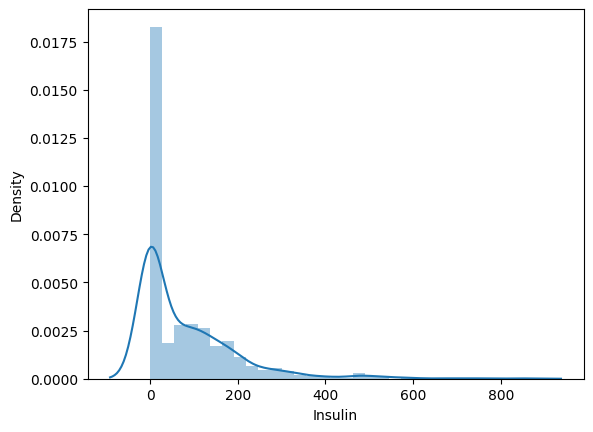

In [ ]:
sns.distplot(dataframe['Insulin'])

for this we go with median imputation

In [ ]:
## Doing Data Imputation

##Insulin -> Right Skewed Distribution
dataframe['Insulin'] = dataframe['Insulin'].replace(0,dataframe['Insulin'].median())

<ipython-input-73-502b279ac25a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['SkinThickness'])


<Axes: xlabel='SkinThickness', ylabel='Density'>

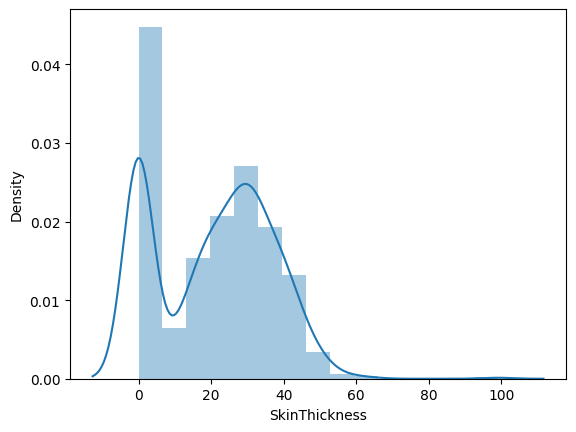

In [ ]:
sns.distplot(dataframe['SkinThickness'])

for this we go with mean imputation

In [ ]:
## Doing Data Imputation

##SkinThickness -> Right Skewed Distribution
dataframe['SkinThickness'] = dataframe['SkinThickness'].replace(0,dataframe['SkinThickness'].median())

<ipython-input-75-6fff0c75e567>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

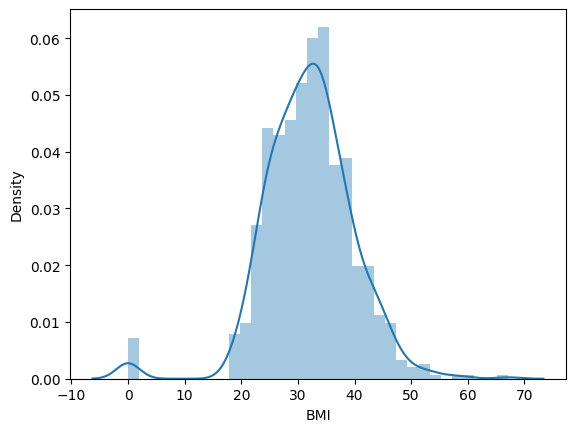

In [ ]:
sns.distplot(dataframe['BMI'])

for this we go with mean imputation

In [ ]:
## Doing Data Imputation

##BMI -> Symmetric kind Distribution
dataframe['BMI'] = dataframe['BMI'].replace(0,dataframe['BMI'].mean())

<ipython-input-77-59879ddc0378>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['DiabetesPedigreeFunction'])


<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

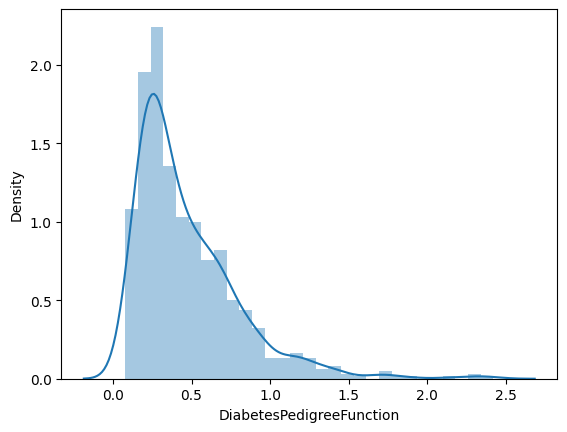

In [ ]:
sns.distplot(dataframe['DiabetesPedigreeFunction'])

for this we go with median imputation

In [ ]:
## Doing Data Imputation

##DiabetesPedigreeFunction -> Right Skewed Distribution
dataframe['DiabetesPedigreeFunction'] = dataframe['DiabetesPedigreeFunction'].replace(0,dataframe['DiabetesPedigreeFunction'].median())

<ipython-input-79-5b59e3c1d4e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['Age'])


<Axes: xlabel='Age', ylabel='Density'>

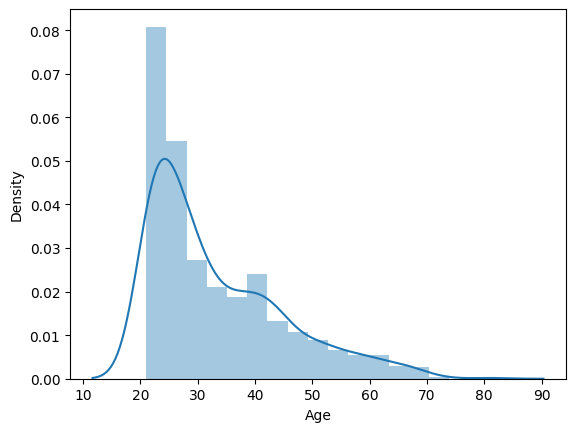

In [ ]:
sns.distplot(dataframe['Age'])

for this we go with median imputation

In [ ]:
## Doing Data Imputation

##Age -> Right Skewed Distribution
dataframe['Age'] = dataframe['Age'].replace(0,dataframe['Age'].median())

<ipython-input-81-98e174ec345e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['Glucose'])


<Axes: xlabel='Glucose', ylabel='Density'>

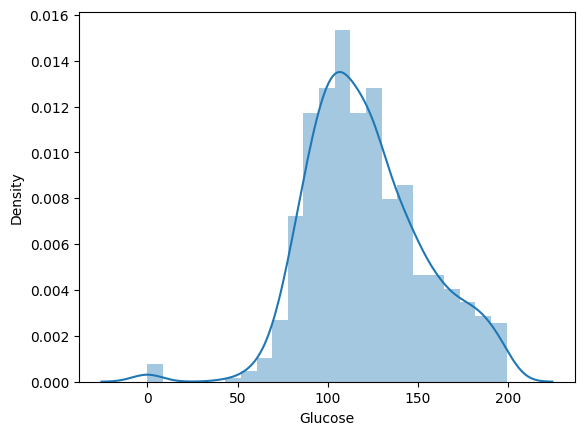

In [ ]:
sns.distplot(dataframe['Glucose'])

for this we go with mean imputation

In [ ]:
## Doing Data Imputation

##Glucose -> Symmetric kind Distribution
dataframe['Glucose'] = dataframe['Glucose'].replace(0,dataframe['Glucose'].mean())

Data Imputation Done : there are no 0's value present

In [ ]:
dataframe.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,30.5,33.600000,0.627,50,1
1,1,85.0,66.000000,29,30.5,26.600000,0.351,31,0
2,8,183.0,64.000000,23,30.5,23.300000,0.672,32,1
3,1,89.0,66.000000,23,94.0,28.100000,0.167,21,0
4,3,137.0,40.000000,35,168.0,43.100000,2.288,33,1
5,5,116.0,74.000000,23,30.5,25.600000,0.201,30,0
6,3,78.0,50.000000,32,88.0,31.000000,0.248,26,1
7,10,115.0,69.105469,23,30.5,35.300000,0.134,29,0
8,2,197.0,70.000000,45,543.0,30.500000,0.158,53,1
9,8,125.0,96.000000,23,30.5,31.992578,0.232,54,1


**Outlier Detection**

In [ ]:
## x -> input Features , y -> target value
## we will split the data into x and y

x = dataframe.drop(columns='Outcome',axis=1)
y = dataframe['Outcome']

**BOX Plot**

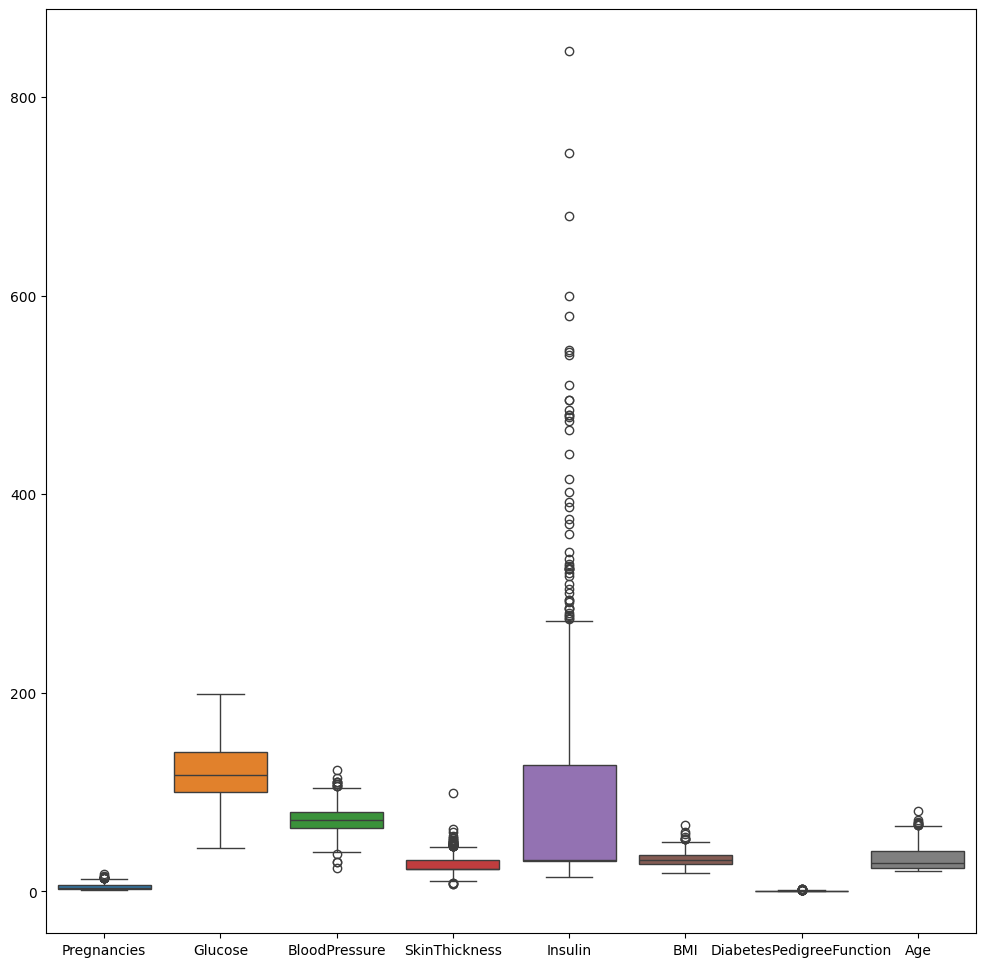

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.boxplot(data = x,ax=ax)
plt.savefig("Boxplot.jpg")
plt.show()

There are too many outliers present in the dataset.

Detecting the outliers by using IQR Approach

In [ ]:
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X_outlier_detection = x
y_outlier_detection = y
for col in cols:

  Q3 = x[col].quantile(0.75)
  Q1 = x[col].quantile(0.25)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  mask = (x[col] >= lower_bound) & (x[col] <= upper_bound)
  X_outlier_detection= X_outlier_detection[mask]
  y_outlier_detection = y_outlier_detection[mask]
  for idx, name in enumerate(mask.value_counts().index.tolist()):
    print(f"for {col},{name}->{mask.value_counts()[idx]}")

for Pregnancies,True->754
for Pregnancies,False->14
for Glucose,True->768
for BloodPressure,True->754
for BloodPressure,False->14
for SkinThickness,True->733
for SkinThickness,False->35
for Insulin,True->719
for Insulin,False->49
for BMI,True->760
for BMI,False->8
for DiabetesPedigreeFunction,True->739
for DiabetesPedigreeFunction,False->29
for Age,True->759
for Age,False->9


<ipython-input-86-636588a3221e>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"for {col},{name}->{mask.value_counts()[idx]}")
<ipython-input-86-636588a3221e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_outlier_detection= X_outlier_detection[mask]
<ipython-input-86-636588a3221e>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"for {col},{name}->{mask.value_counts()[idx]}")
<ipython-input-86-636588a3221e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_outlier_detection= X_outlier_detection[mask]
<ipython-input-86-636588a322

In [ ]:
# shape of real dataset
x.shape

(768, 8)

In [ ]:
# shape of data after outliers removal
X_outlier_detection.shape

(628, 8)

we will see after outlier detection:
intially datapoints are: 768
after outlier removal datapoints are: 628

100 datasets which are ouliers are completely removed

In [ ]:
y_outlier_detection.shape

(628,)

To Remove the Biasness towads a specifc column we have two Methods:
1.   **Standardization**
2.   **Min/Max Scalar**



**Standardization**

we try to convert data into standard normal form where mean = 0 and standard deviation = 1

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_outlier_detection)

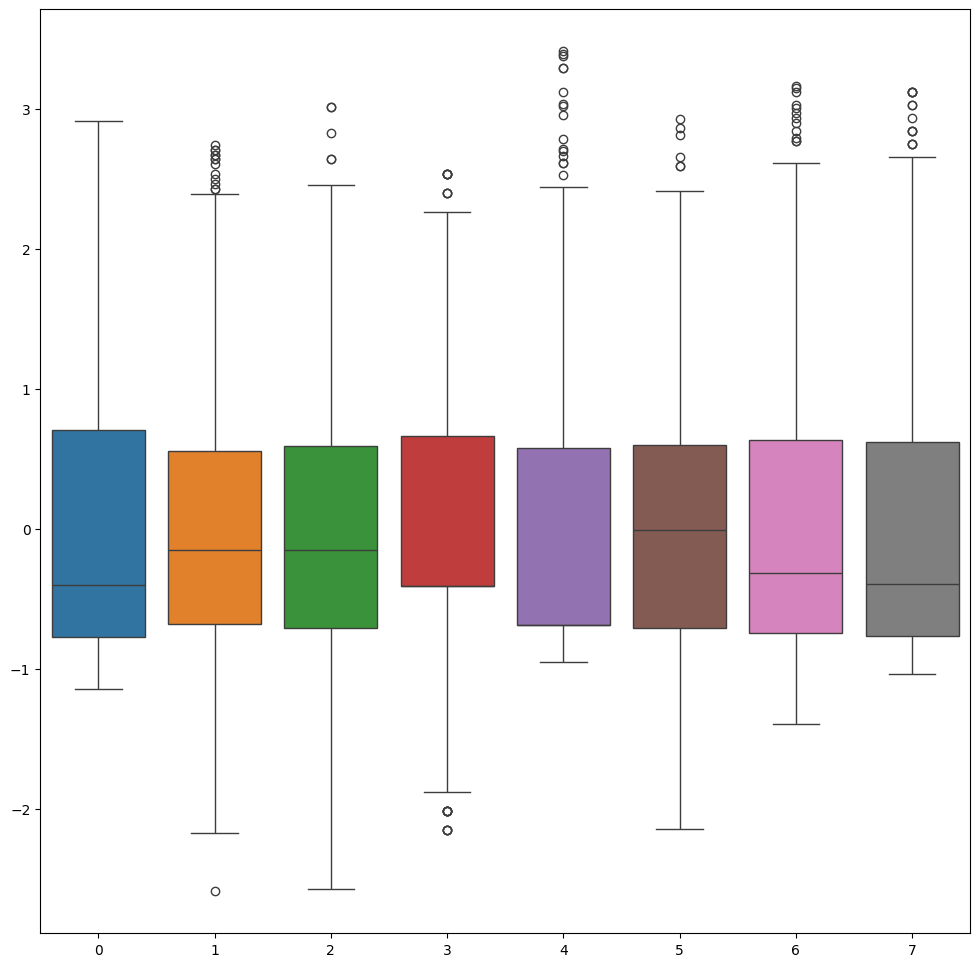

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.boxplot(data = X_scaled,ax=ax)
plt.savefig("Boxplot.jpg")
plt.show()

In [ ]:
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']


In [ ]:
X_scaled = pd.DataFrame(X_scaled,columns =cols)
X_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02
mean,-8.910070e-17,-2.206303e-16,-4.002460e-16,-2.149731e-16,-4.242891e-17,4.631822e-16,2.687164e-16,-1.329439e-16
std,1.000797e+00,1.000797e+00,1.000797e+00,1.000797e+00,1.000797e+00,1.000797e+00,1.000797e+00,1.000797e+00
min,-1.143220e+00,-2.591010e+00,-2.572205e+00,-2.149687e+00,-9.543442e-01,-2.144326e+00,-1.396133e+00,-1.042123e+00
25%,-7.742879e-01,-6.824103e-01,-7.099618e-01,-4.106815e-01,-6.910862e-01,-7.097893e-01,-7.453083e-01,-7.648122e-01
50%,-4.053556e-01,-1.507913e-01,-1.512888e-01,-4.106815e-01,-6.910862e-01,-8.460315e-03,-3.134717e-01,-3.950647e-01
75%,7.014414e-01,5.551290e-01,5.936087e-01,6.594760e-01,5.742509e-01,5.972329e-01,6.341130e-01,6.217411e-01
max,2.915035e+00,2.742610e+00,3.014525e+00,2.532252e+00,3.410644e+00,2.924370e+00,3.159641e+00,3.117537e+00


In [ ]:
X_scaled.shape

(628, 8)

In [ ]:
y_outlier_detection.shape

(628,)

as we can see the data is now in standard normal form mean = 0 and standard deviation = 1

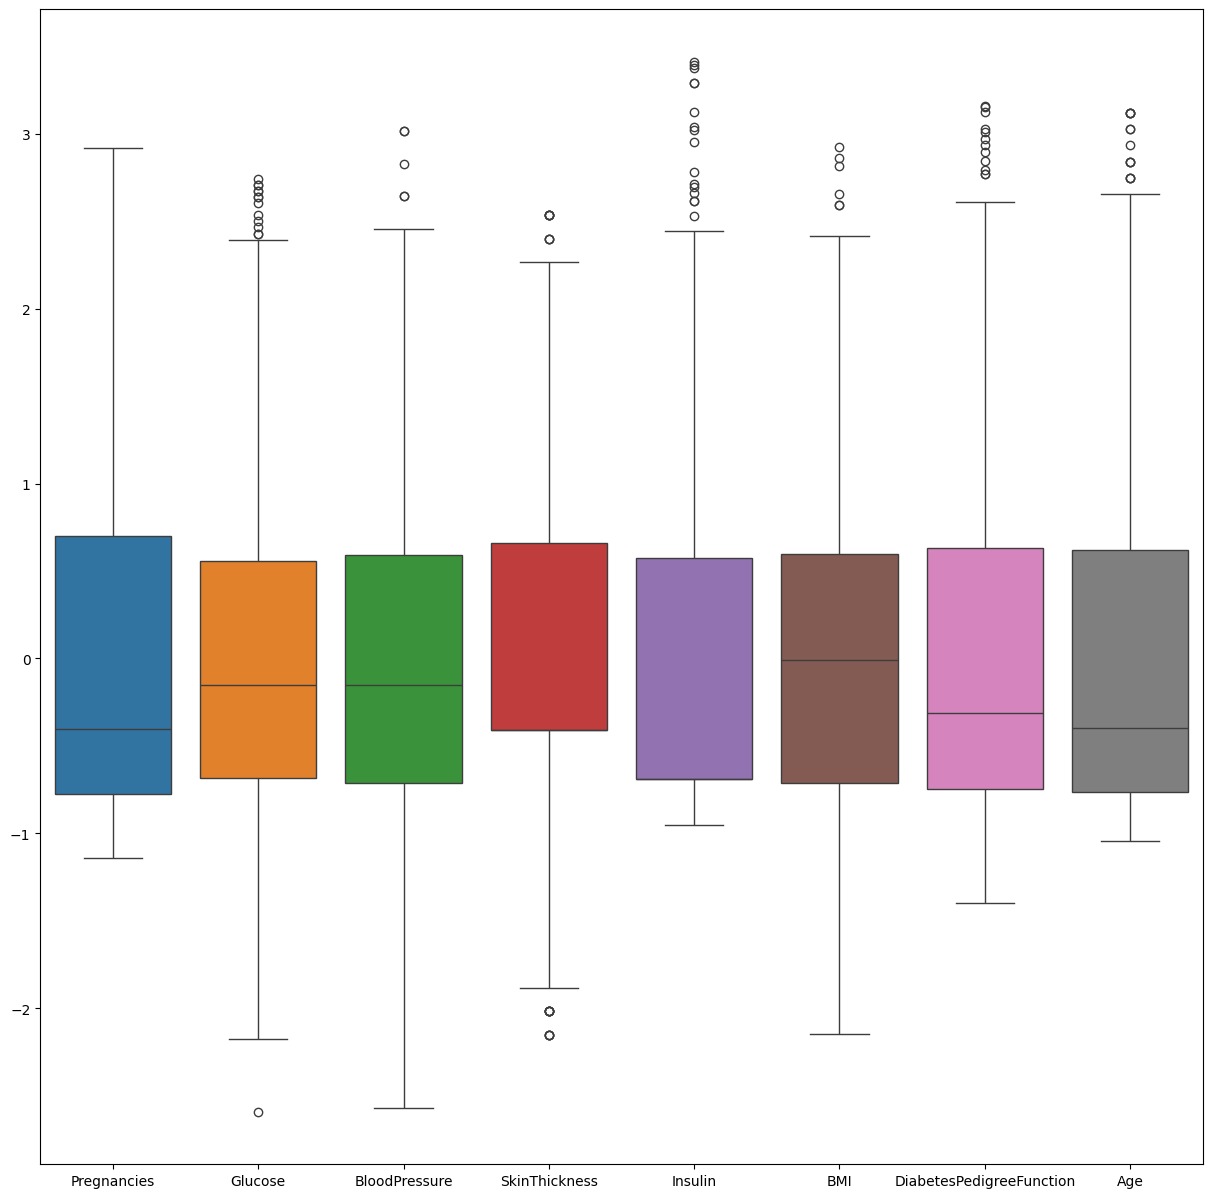

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data = X_scaled,ax=ax)
plt.savefig("Boxplot.jpg")
plt.show()

standardization is complete.

Data Imbalance : we can see here more than 50% of data is biased towards 0

In [ ]:
y_outlier_detection.value_counts()


,count
Outcome,
0,431
1,197


Approach 2  -  Quanntiles(remove the Outliers)

In [ ]:
## Original shape
dataframe.shape

(768, 9)

In [ ]:
## After outlier removal
X_scaled.shape

(628, 8)

doing it in both x and y so that the input features are equal in both the dataset.

In [ ]:
X_scaled.reset_index(drop = True,inplace = True)
y_outlier_detection.reset_index(drop = True,inplace = True)

In [ ]:
q = X_scaled['Insulin'].quantile(.95)
mask = X_scaled['Insulin']<q
dataNew = X_scaled[mask]
y_outlier_detection = y_outlier_detection[mask]

In [ ]:
dataNew.shape

(594, 8)

the number reduced from 628 to 594.it means some outliers are removed

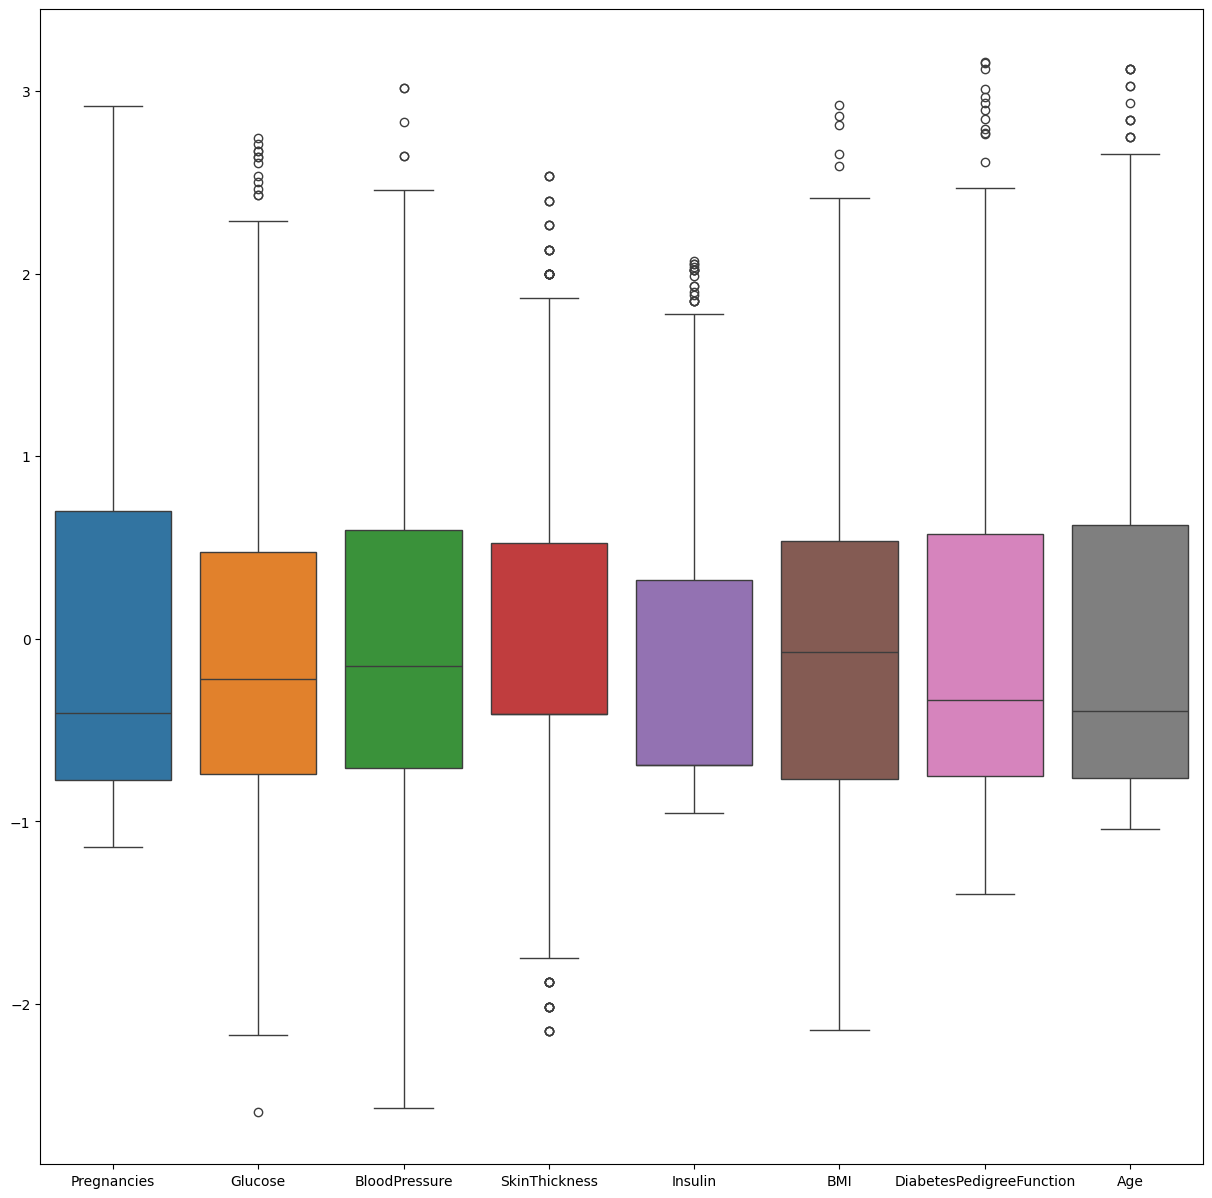

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data = dataNew,ax=ax)
plt.show()

**# STEP 4 -> Model Trainning**  

Splitting of data into trainning and testing

In [ ]:
## X_train , y_train --> training data
## x_test, y_test --> Testing data
#test_size = 0.33 means 33% data contain to testing set and remaining to the training set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(dataNew,y_outlier_detection,test_size=0.20,random_state=44)


In [ ]:
X_train.shape     # training set contains 483 datasets

(475, 8)

In [ ]:
X_test.shape      # testing set contains 275 datasets

(119, 8)

In [ ]:
# we can see here data is biased towards one side. this concept i called as Data Imbalancing
y_train.value_counts()

,count
Outcome,
0,334
1,141


**Data Imbalancing**
it can be handeled by two techniques:
    
    1. Over sampling - take minority class and increase that number of samples equal to to the majority class (by duplicating the sample )
    2. Under sampling - take majority class, and try to decrease the number of sample equal to the minorty class.
    3. SMOTE - Generate synthetic data and try to increase the number of sample in the minority class.

In [ ]:
## SMOTE Technique

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 44)
X_train_resampled,y_train_resampled = smote.fit_resample(X_train,y_train)

# Check resampled class distribution
print("\n Resampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())


 Resampled class distribution:
Outcome
1    334
0    334
Name: count, dtype: int64


we can see above the imbalanced dat is now balanced.

#Training the Model

In [ ]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression()
classification.fit(X_train_resampled,y_train_resampled)


LogisticRegression()

#Model Prediction

In [ ]:
y_predictions = classification.predict(X_test)
print("The predicted values are :\n",y_predictions)

The predicted values are :
 [0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0
 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 0]


# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predictions)

0.7647058823529411

we get almost 75 % accuracy given by Model Predictions.

#checking classification report

healthcare domain: Recall is very important mertics

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Non- Diabetic','Diabetic']
print(classification_report(y_test,y_predictions,target_names=target_names))

               precision    recall  f1-score   support

Non- Diabetic       0.85      0.78      0.81        78
     Diabetic       0.64      0.73      0.68        41

     accuracy                           0.76       119
    macro avg       0.74      0.76      0.75       119
 weighted avg       0.78      0.76      0.77       119



In [ ]:
## Saving the model
import pickle
pickle.dump(classification,open("classification_model.pkl","wb"))

In [ ]:
## loading the file
classification_model = pickle.load(open("classification_model.pkl","rb"))
classification_model.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0])